In [1]:
# Import anayltics tools
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [2]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy import text
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [3]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [4]:
# Declare a Base using `automap_base()`
Base = automap_base()

# Use the Base class to reflect the database tables
Base.prepare(autoload_with=engine)

In [5]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['station', 'measurement']

In [6]:
# Assign the measurement class to a variable called `Measurement` and
# the station class to a variable called `Station`
Measurement = Base.classes.measurement
Station = Base.classes.station

In [7]:
# Create a session
session = Session(engine)

# Exploratory Precipitation Analysis

In [8]:
# 1. Find the most recent date in the dataset.
mr_date = session.query(func.max(Measurement.date)).first()
mr_date

('2017-08-23',)

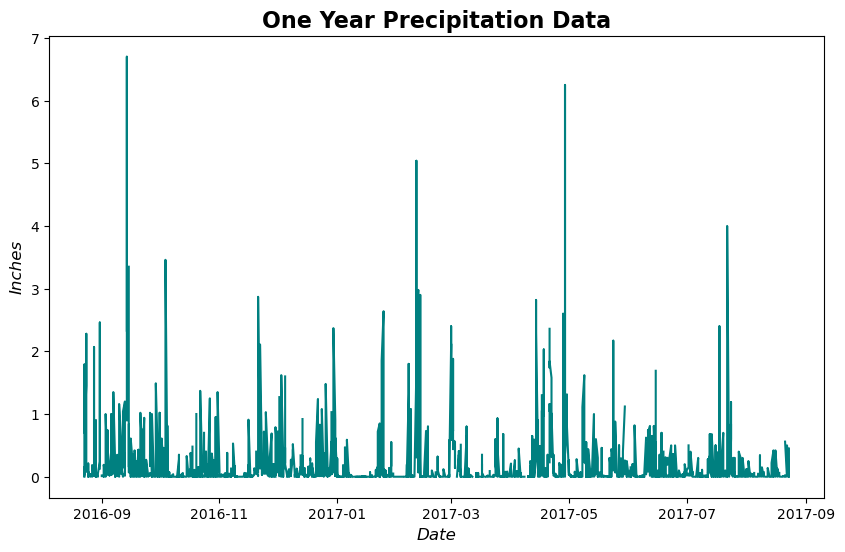

In [9]:
# 2. Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.

# Calculate the date one year from the last date in data set.
prcp_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# 3. Perform a query to retrieve the data and precipitation scores
prcp_scores = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= prcp_date).\
    order_by(Measurement.date.asc()).\
    all()

# 4. Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df = pd.DataFrame(prcp_scores, columns=["Date", "Precipitation"])

# 5. Sort the dataframe by date
prcp_df["Date"] = pd.to_datetime(prcp_df['Date'])
prcp_df = prcp_df.sort_values(by="Date", ascending=True).reset_index(drop=True)

# 6. Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(10, 6))
plt.plot(prcp_df.Date, prcp_df.Precipitation, color="teal")
plt.title("One Year Precipitation Data", fontsize=16, fontweight="bold")
plt.xlabel("Date", fontsize=12, fontstyle="italic")
plt.ylabel("Inches", fontsize=12, fontstyle="italic")
plt.show()

In [10]:
# 7. Use Pandas to calculate the summary statistics for the precipitation data
prcp_df.Precipitation.describe() 

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Precipitation, dtype: float64

# Exploratory Station Analysis

In [11]:
# 1. Design a query to calculate the total number of stations in the dataset
num_stations = session.query(func.count(Station.station)).all()
num_stations 

[(9,)]

In [12]:
# 2. Design a query to find the most active stations (i.e. which stations have the most rows)
# List the stations and their counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [17]:
# 3. Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()
# query = """
#     SELECT
#         min(tobs) as min_temp,
#         avg(tobs) as avg_temp,
#         max(tobs) as max_temp
#     FROM
#         measurement
#     WHERE
#         station = 'USC00519281';
# """

# df = pd.read_sql(text(query), con=engine)
# df.head()

[(54.0, 85.0, 71.66378066378067)]

In [19]:
# 4. Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
 
results = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= prev_year).all()
# query = """
#     SELECT
#         date,
#         station,
#         tobs
#     FROM
#         measurement
#     WHERE
#         date >= '2016-08-23'
#         and station = 'USC00519281'
#     ORDER BY
#         date ASC;
# """

# df = pd.read_sql(text(query), con=engine)
# df.head()

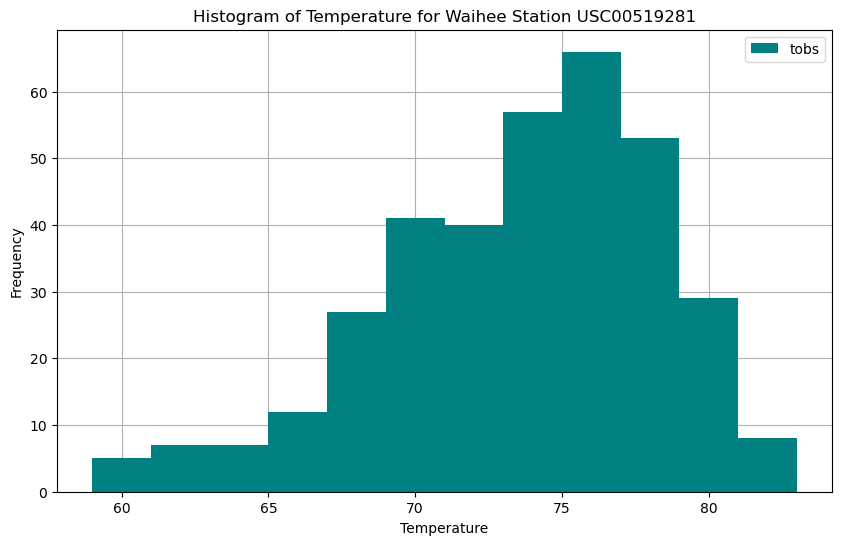

In [15]:
 # Calculate the date one year from the last date in data set.
start_date = dt.date(2016, 8, 23)

# Perform a query to retrieve the data and tobs scores
results = session.query(Measurement.date, Measurement.station, Measurement.tobs).\
    filter(Measurement.date >= start_date).\
    filter(Measurement.station == 'USC00519281').\
    order_by(Measurement.date.asc()).\
    all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df2 = pd.DataFrame(results, columns=["Date", "Station", "TOBS"])

# Sort the dataframe by date
df2["Date"] = pd.to_datetime(df2['Date'])
df2 = df2.sort_values(by="Date", ascending=True).reset_index(drop=True)

# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(10,6))
plt.hist(df2.TOBS, color="teal", bins=12, label='tobs')
plt.legend()
plt.gca().set_axisbelow(True)
plt.grid(True)
plt.ylabel("Frequency")
plt.xlabel("Temperature")
plt.title("Histogram of Temperature for Waihee Station USC00519281")
plt.show()

# Close Session

In [16]:
# 5. Close Session
session.close()
